In [ ]:
from fastai2.vision.all import *
from animal_sounds import *

In [ ]:
source = sounds_source()

In [ ]:
dblock = DataBlock((ImageBlock(PILImageBW), CategoryBlock), get_items=get_files,
                    get_x=get_spec, get_y=parent_label,
                    splitter=RandomSplitter(seed=42))

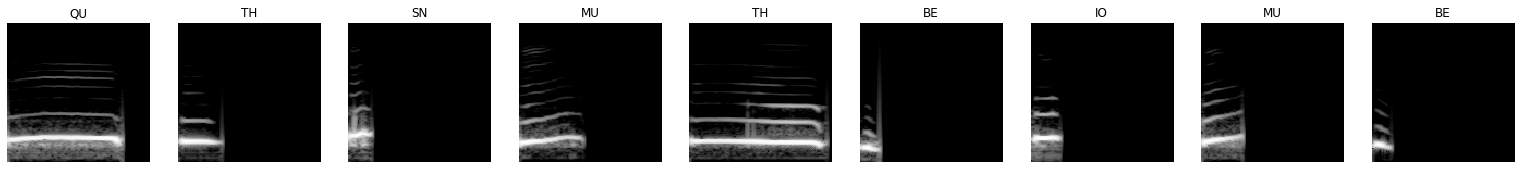

In [ ]:
dls = dblock.dataloaders(source, bs=64)
dls.show_batch(nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

In [ ]:
learn.load_encoder('duration-encoder')

In [ ]:
learn.fine_tune(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.874788,0.903159,0.733699,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.155825,0.078591,0.981469,00:13


### 1-1
| model | acc | ptrain | BW | ptrain-dur |
| ----- | --- | ------ | -- | ---------- |
| resnet18 | 0.975 | yes | yes | no |
| resnet18 | 0.978 | yes | yes | yes |